# Notebook for analyzing Grenville thermochron data compilation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format='retina'

## Load in compilation file

In [15]:
study_summary = pd.read_csv('../data/thermochron_compilation/study_summary.csv')
study_summary = study_summary[study_summary['Age'] < 1090]
study_summary = study_summary.sort_values(by='Age').reset_index(drop=1)

study_summary.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,C-93-9,599.0,16.0,16.0,U/Pb,Reset,granite,"Zircon, Rutile",TIMS,Direct,Grenville Province,ON,44.91704,-77.10352,Sand Lake,Mazinaw terrane - Norway Lake granite,Plutonic,granite,"Corfu, F. and Easton, R.M., 1995. U-Pb geochro..."
1,FA-810101,630.0,64.0,64.0,K/Ar,Igneous Crystallization,medium- to fine-grained massive dark grey diab...,Whole Rock,Ar Furnace-Fusion,Estimate,Grenville Province,QC,47.23340,-78.78313,3 km NW of the rapids below Lc des Cinq Milles...,Parauthochthonous Belt - unknown,Plutonic,medium- to fine-grained massive dark grey diab...,"Stevens, R.D., Delabio, R.N. and Lachance, G.R..."
2,FA-810101A,654.0,46.0,46.0,K/Ar,Igneous Crystallization,fine- to medium-grained massive dark grey diab...,Whole Rock,Ar Furnace-Fusion,Estimate,Grenville Province,QC,47.23340,-78.78313,3 km NW of the rapids below Lac des Cinq Mille...,Parauthochthonous Belt - unknown,Plutonic,fine- to medium-grained massive dark grey diab...,"Stevens, R.D., Delabio, R.N. and Lachance, G.R..."
3,SSA-10A,731.0,8.0,8.0,Ar/Ar,Cooling,pegmatite,K-Feldspar,Ar Furnace-Step,Estimate,Grenville Province,ON,45.50006,-78.24977,Approx. 50 km WSE of Pembroke. Location approx...,Central Gneiss Belt - unknown,Plutonic,pegmatite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
4,SSA-11B,758.0,8.0,8.0,Ar/Ar,Cooling,amphibolite,K-Feldspar,Ar Furnace-Fusion,Estimate,Grenville Province,ON,45.58339,-78.38311,Huntsville area. Location approximate.,Central Gneiss Belt - unknown,Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."


In [3]:
study_summary.Age_Material.unique()

array(['Zircon, Rutile', 'Whole Rock', 'K-Feldspar', 'Biotite',
       'Titanite', 'Zircon, Monazite', 'Muscovite', 'Rutile',
       'Phlogopite', 'Hornblende', 'Zircon', 'Zircon, Titanite',
       'Monazite', 'Uraninite', 'Monazite, Xenotime', 'Garnet',
       'Monazite, Titanite', 'Thorianite, Uraninite', 'Thorianite'],
      dtype=object)

### plot all ages

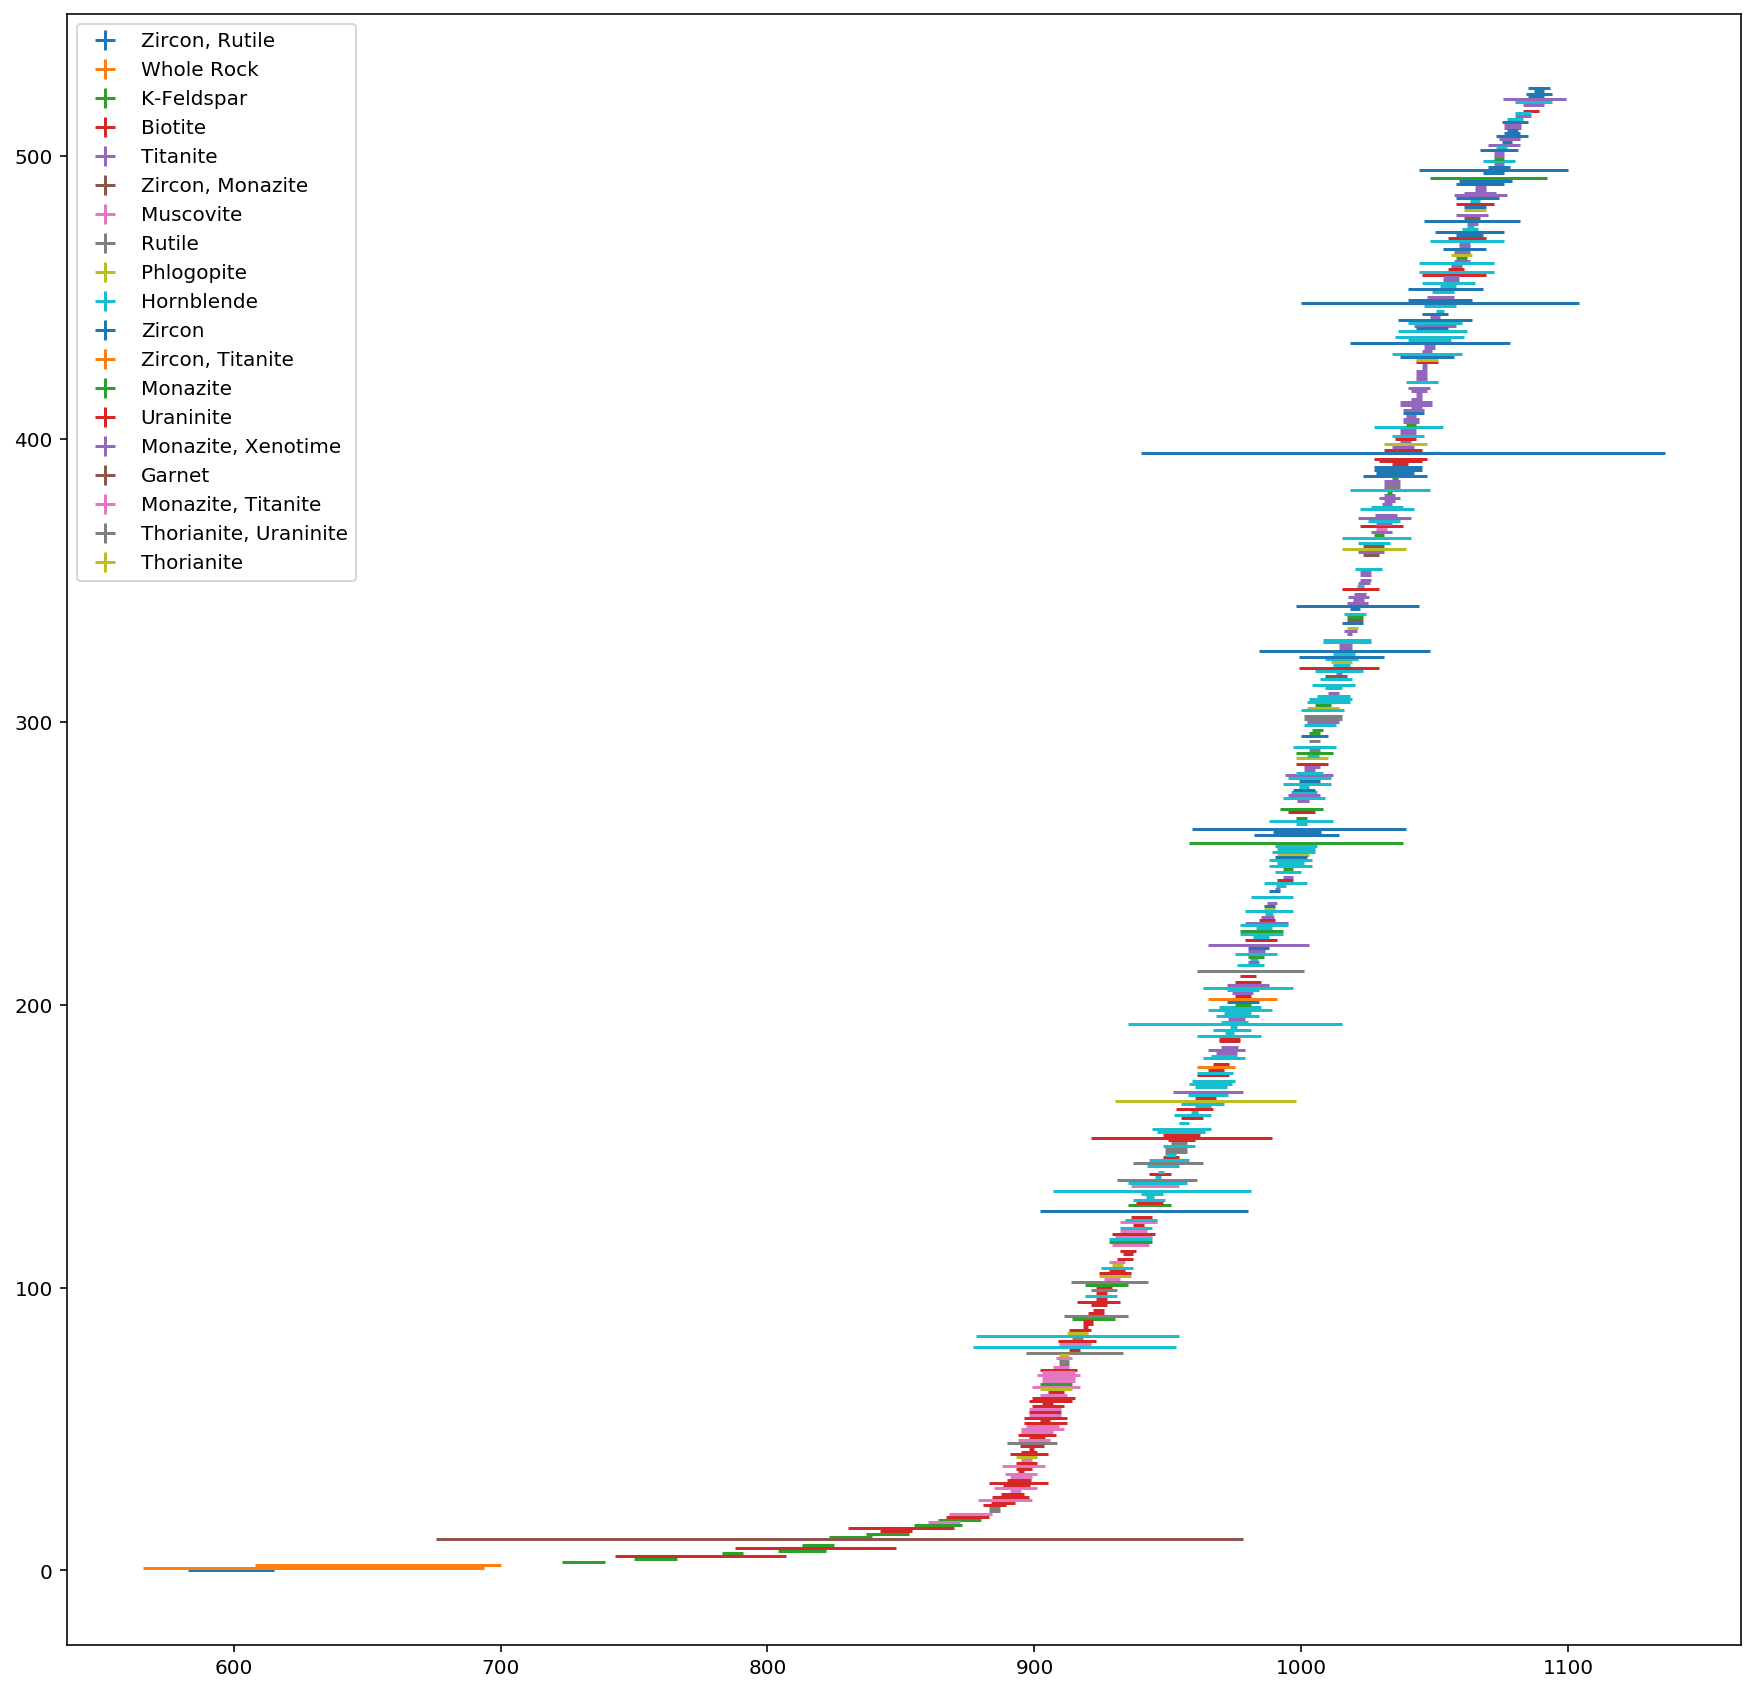

In [4]:
plt.figure(figsize=(15, 15))
for i in range(len(study_summary.Age_Material.unique())):
    this_material = study_summary[study_summary['Age_Material'] == study_summary.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index, 0, this_material['Error_Plus'], 
                 color='C'+str(i), ls='None', label=study_summary.Age_Material.unique()[i])
plt.legend()

### plot all rutile ages

<ErrorbarContainer object of 3 artists>

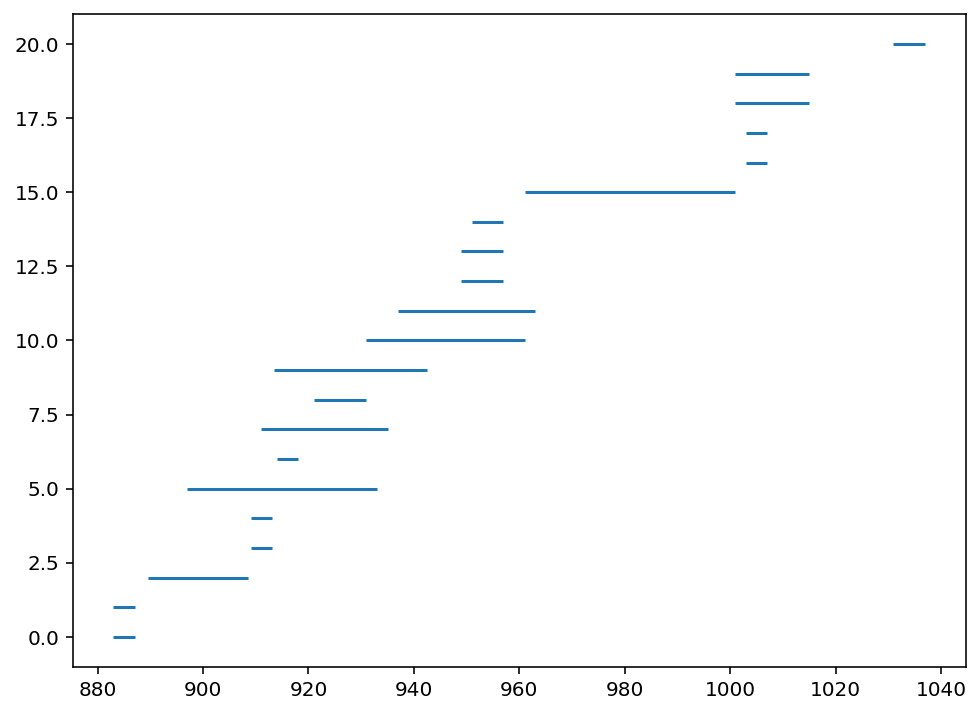

In [5]:
plt.figure(figsize=(8, 6))

rutile_data = study_summary[study_summary['Age_Material'] == 'Rutile'].reset_index(drop=1)
plt.errorbar(rutile_data['Age'], rutile_data.index, 0, rutile_data['Error_Plus'], 
                 color='C0', ls='None', label='rutile')
# plt.legend()

## Let's use general constraints on the closure temperatures for the minerals.

- Biotite: 280 +- 40
- Hornblende: 530 +- 50
- Monazite: 600-650
- Titanite: 660-700
- Rutile: 500-540



In [6]:
closure_temp_bounds_dict = {'Biotite':[280, 60], 
                            'Hornblende':[500, 80], 
                            'Rutile':[625, 125], 
                            'Monazite':[1000,100], 
                            'Titanite':[575, 75]}

color_dict = {'Biotite':'C0', 
              'Hornblende':'C1', 
              'Rutile':'C2', 
              'Monazite':'C3', 
              'Titanite':'C4'}

## Get Bancroft Terrane records

In [16]:
Bancroft_records = study_summary[study_summary['Geological_Info'].str.contains('Bancroft')]
Bancroft_records = Bancroft_records[~Bancroft_records['Age_Material'].str.contains('Muscovite|Allanite|Garnet|Zircon|K-Feldspar|Phlogopite')]

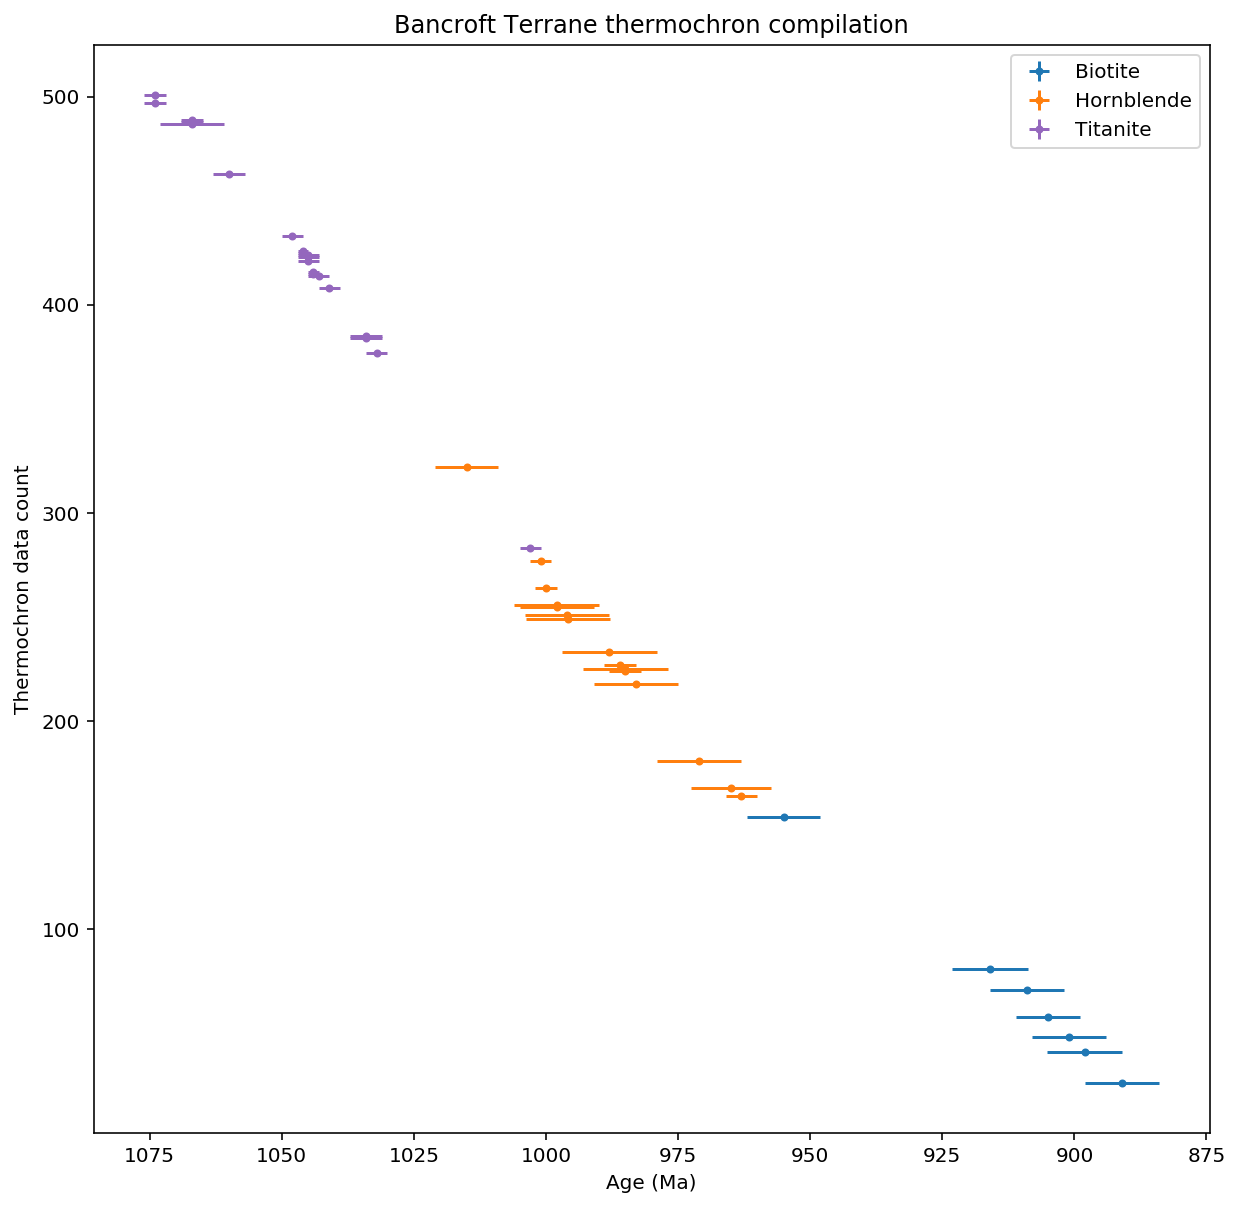

In [17]:
plt.figure(figsize=(10, 10))
for i in range(len(Bancroft_records.Age_Material.unique())):
    this_material = Bancroft_records[Bancroft_records['Age_Material'] == Bancroft_records.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index, 0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Bancroft_records.Age_Material.unique()[i]], ls='None', label=Bancroft_records.Age_Material.unique()[i])
plt.title('Bancroft Terrane thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

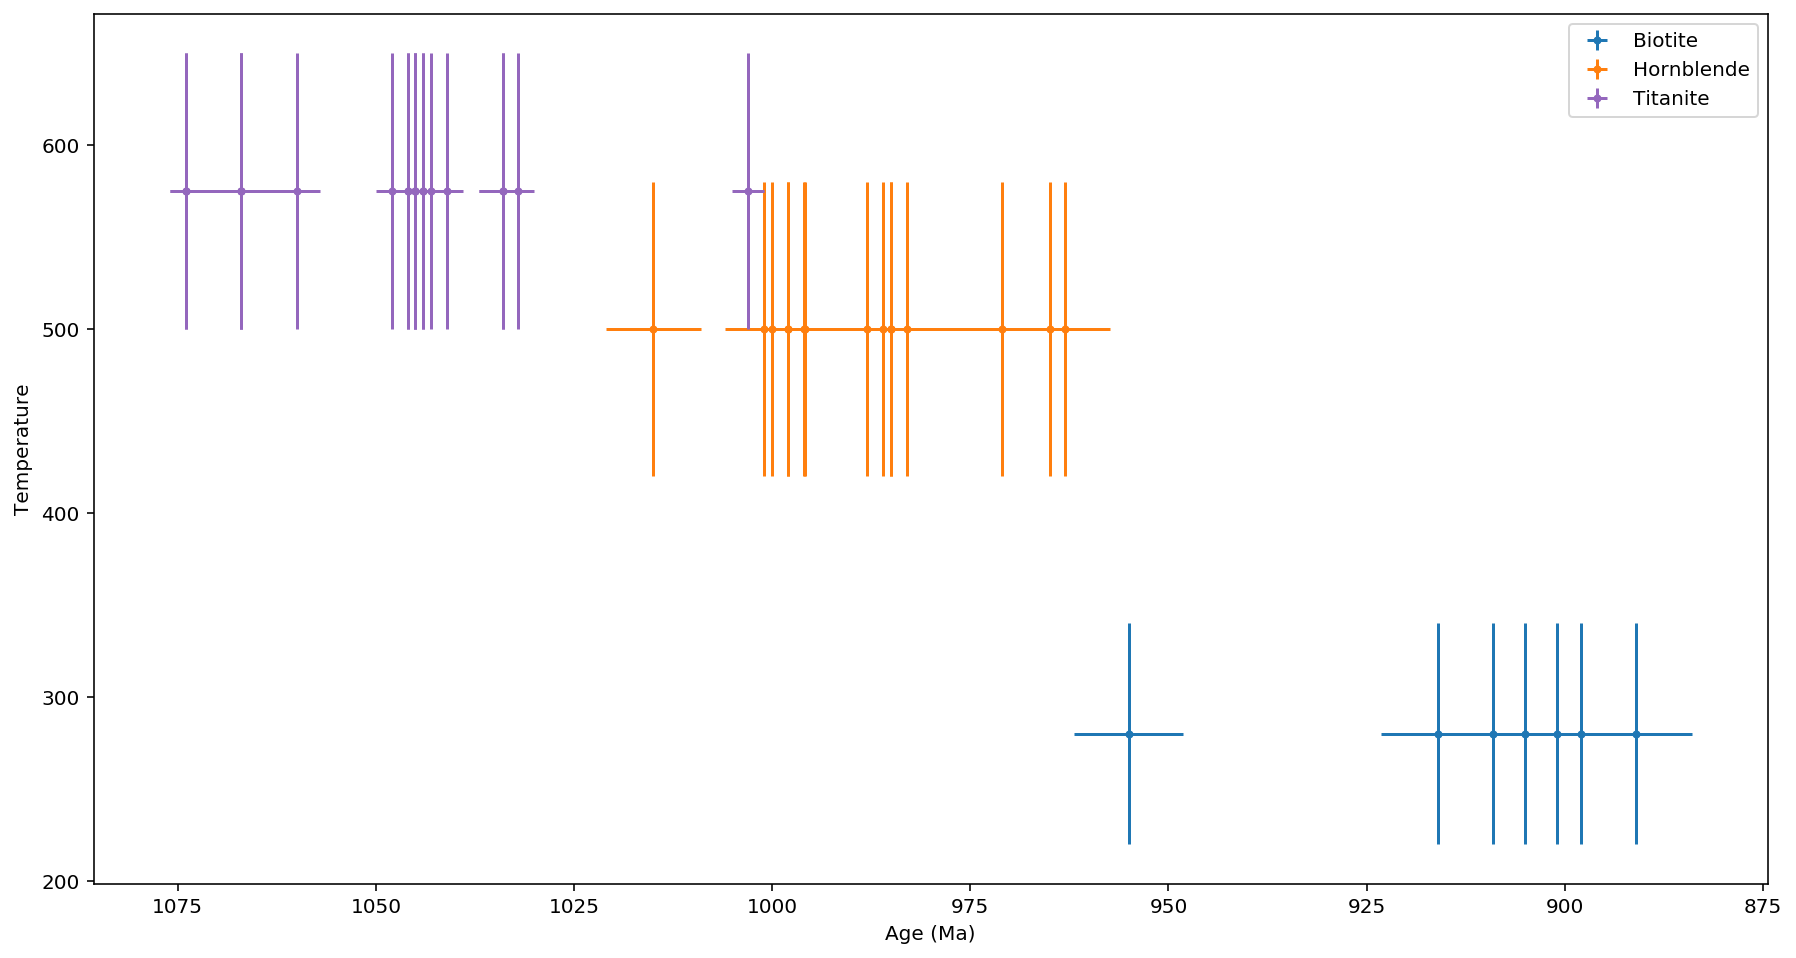

In [18]:
plt.figure(figsize=(15, 8))
for i in Bancroft_records.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Bancroft_records[Bancroft_records['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

## Load Adirondack lowlands ages

In [7]:
Adirondack_lowlands_ages = pd.read_csv('../data/thermochron_compilation/Adirondack_lowlands.csv')
Adirondack_lowlands_ages = Adirondack_lowlands_ages[Adirondack_lowlands_ages['Age'] < 1090]
Adirondack_lowlands_ages = Adirondack_lowlands_ages[Adirondack_lowlands_ages['Age_Material'] != 'Garnet']
Adirondack_lowlands_ages = Adirondack_lowlands_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Adirondack_lowlands_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,SE596-49,895.0,1.0,1.0,Ar/Ar,Cooling,Plateau Age,Biotite,Laser-Step,Direct,Grenville Province,NY,44.39000,-75.19000,"On Rt 87, north of Dana Hill Rd. 1.9 miles sou...",Carthage-Colton shear zone,Metamorphic,amphibolite,"Streepey, M.M., van der Pluijm, B.A., Essene, ..."
1,AL97-12a,896.0,3.0,3.0,Ar/Ar,Cooling,NaN,Biotite,Laser-Step,NaN,Grenville Province,NY,44.44443,-75.18825,Adirondack Lowlands,Adirondack Lowlands,Metamorphic,Popple Hill gneiss,"Dahl, P.S., Pomfrey, M.E., and Foland, K.A., 2..."
2,AL97-31,898.0,3.0,3.0,Ar/Ar,Cooling,NaN,Biotite,Laser-Step,NaN,Grenville Province,NY,44.19778,-75.28213,Adirondack Lowlands,Adirondack Lowlands,Plutonic,Hermon granite,"Dahl, P.S., Pomfrey, M.E., and Foland, K.A., 2..."
3,PP596-60,899.0,1.0,1.0,Ar/Ar,Cooling,Plateau Age,Biotite,Laser-Step,Direct,Grenville Province,NY,44.53000,-75.04000,1 mile southwest of Pierrepont on Rt. 2. Outcr...,Carthage-Colton shear zone,Metamorphic,garnet biotite sillmanite schist,"Streepey, M.M., van der Pluijm, B.A., Essene, ..."
4,AL98-43,901.0,3.0,3.0,Ar/Ar,Cooling,NaN,Biotite,Laser-Step,NaN,Grenville Province,NY,44.34945,-75.27223,Adirondack Lowlands,Adirondack Lowlands,Plutonic,Hermon granite,"Dahl, P.S., Pomfrey, M.E., and Foland, K.A., 2..."


In [8]:
Adirondack_lowlands_ages.Age_Material.unique()

array(['Biotite', 'Hornblende', 'Rutile', 'Titanite'], dtype=object)

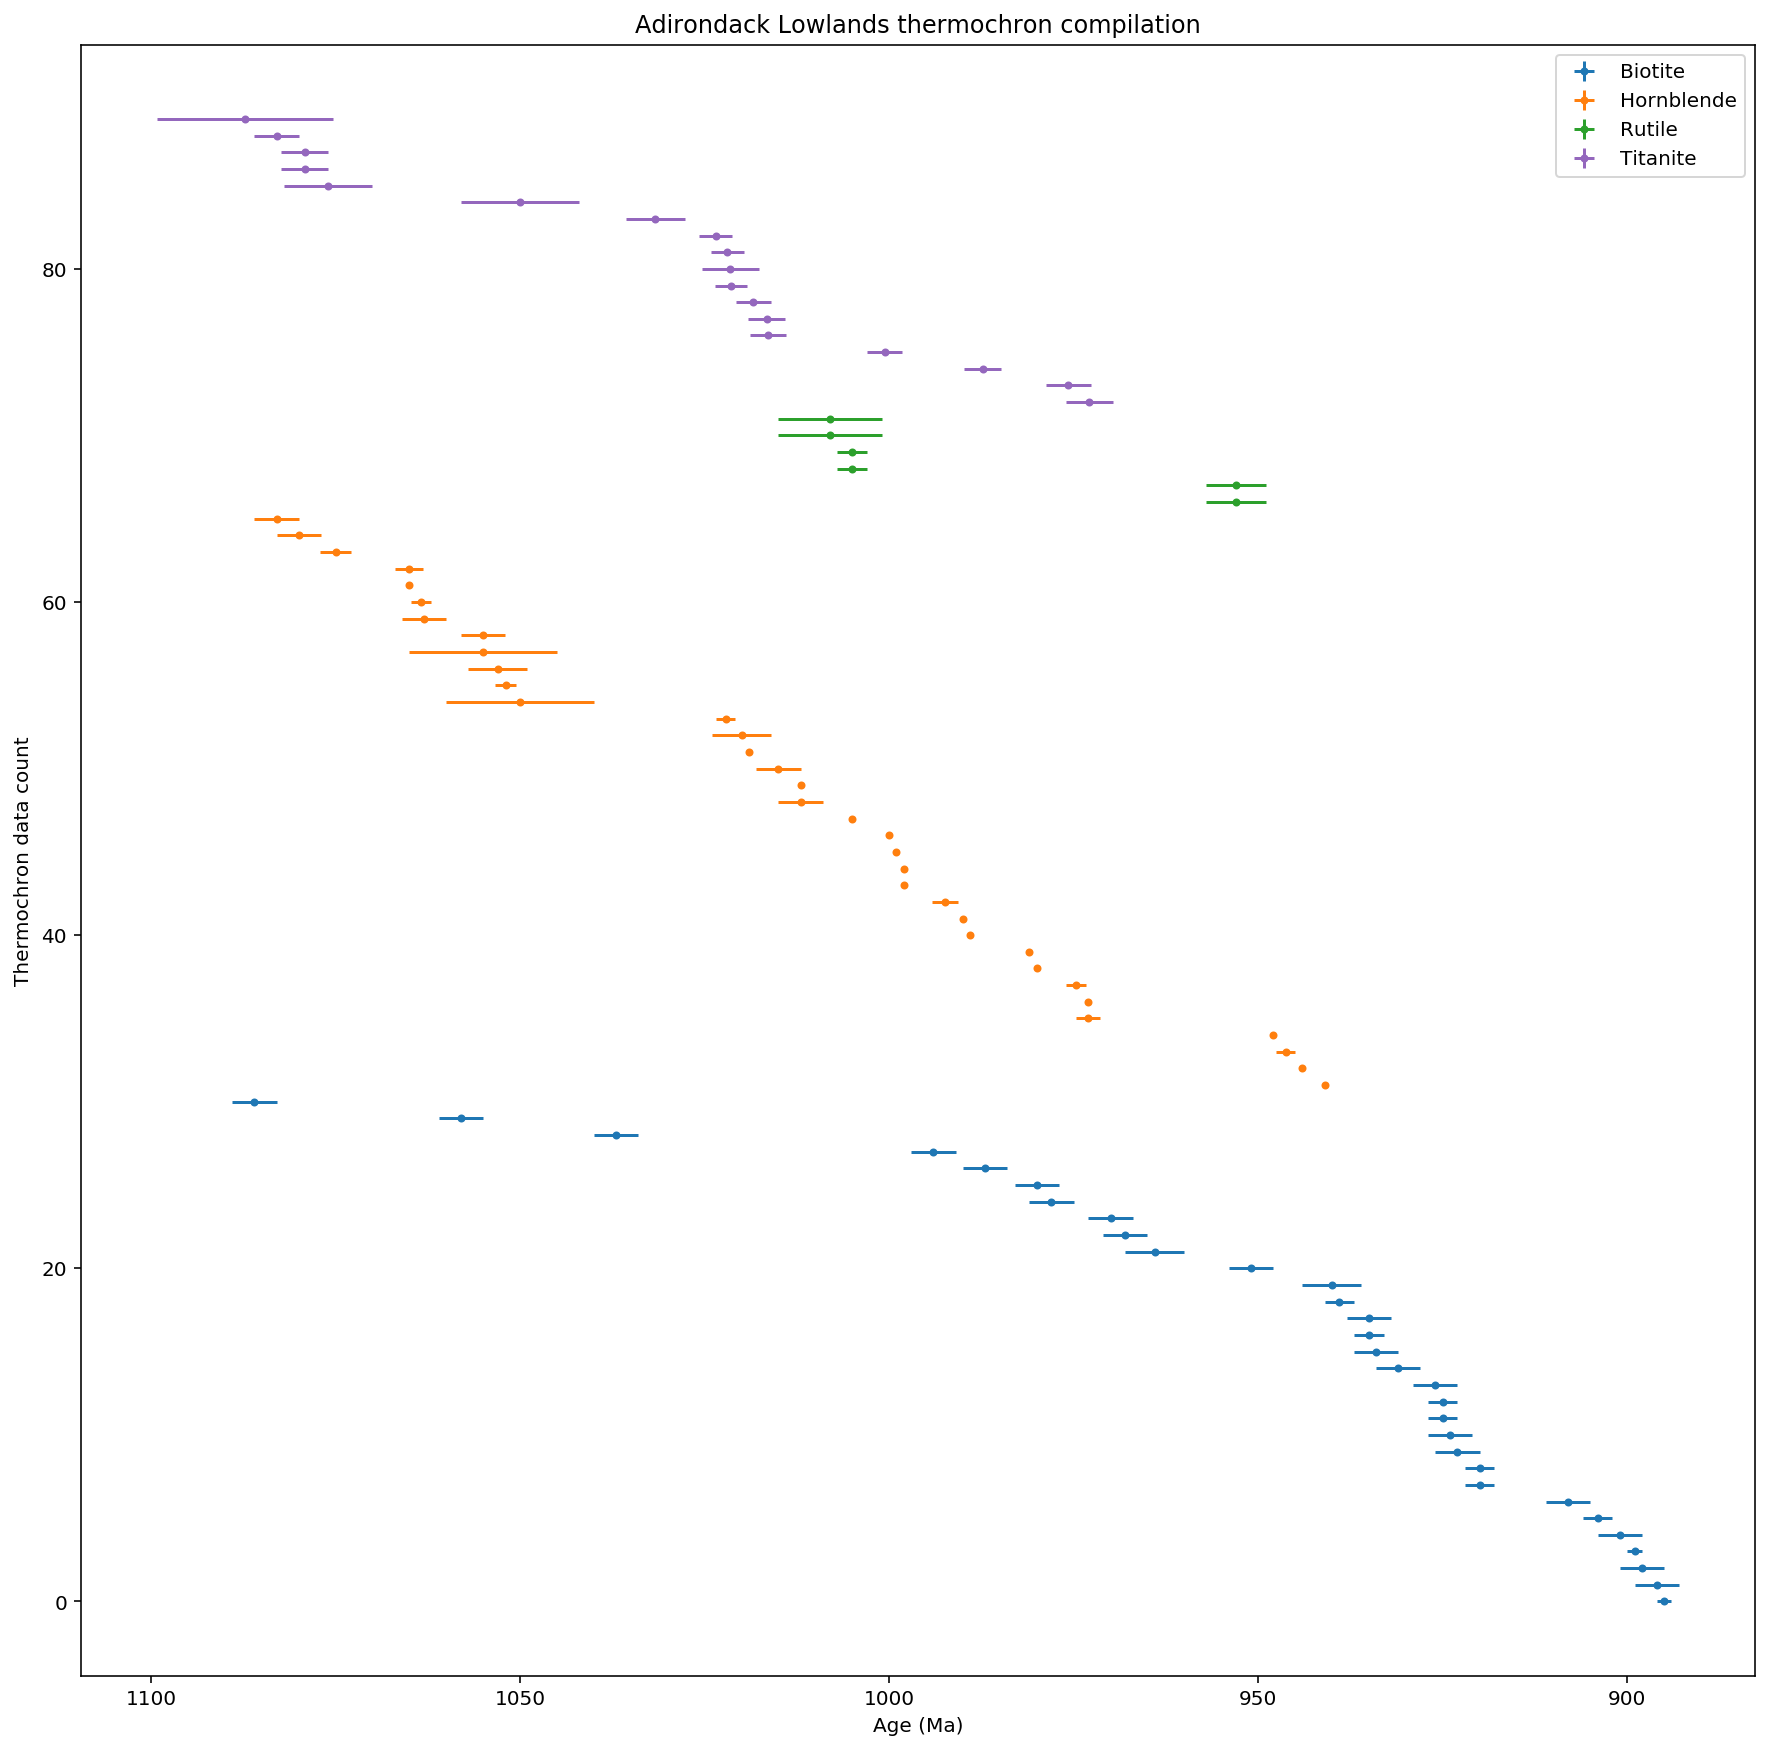

In [9]:
plt.figure(figsize=(15, 15))
for i in range(len(Adirondack_lowlands_ages.Age_Material.unique())):
    this_material = Adirondack_lowlands_ages[Adirondack_lowlands_ages['Age_Material'] == Adirondack_lowlands_ages.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index, 0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Adirondack_lowlands_ages.Age_Material.unique()[i]], ls='None', label=Adirondack_lowlands_ages.Age_Material.unique()[i])
plt.title('Adirondack Lowlands thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()

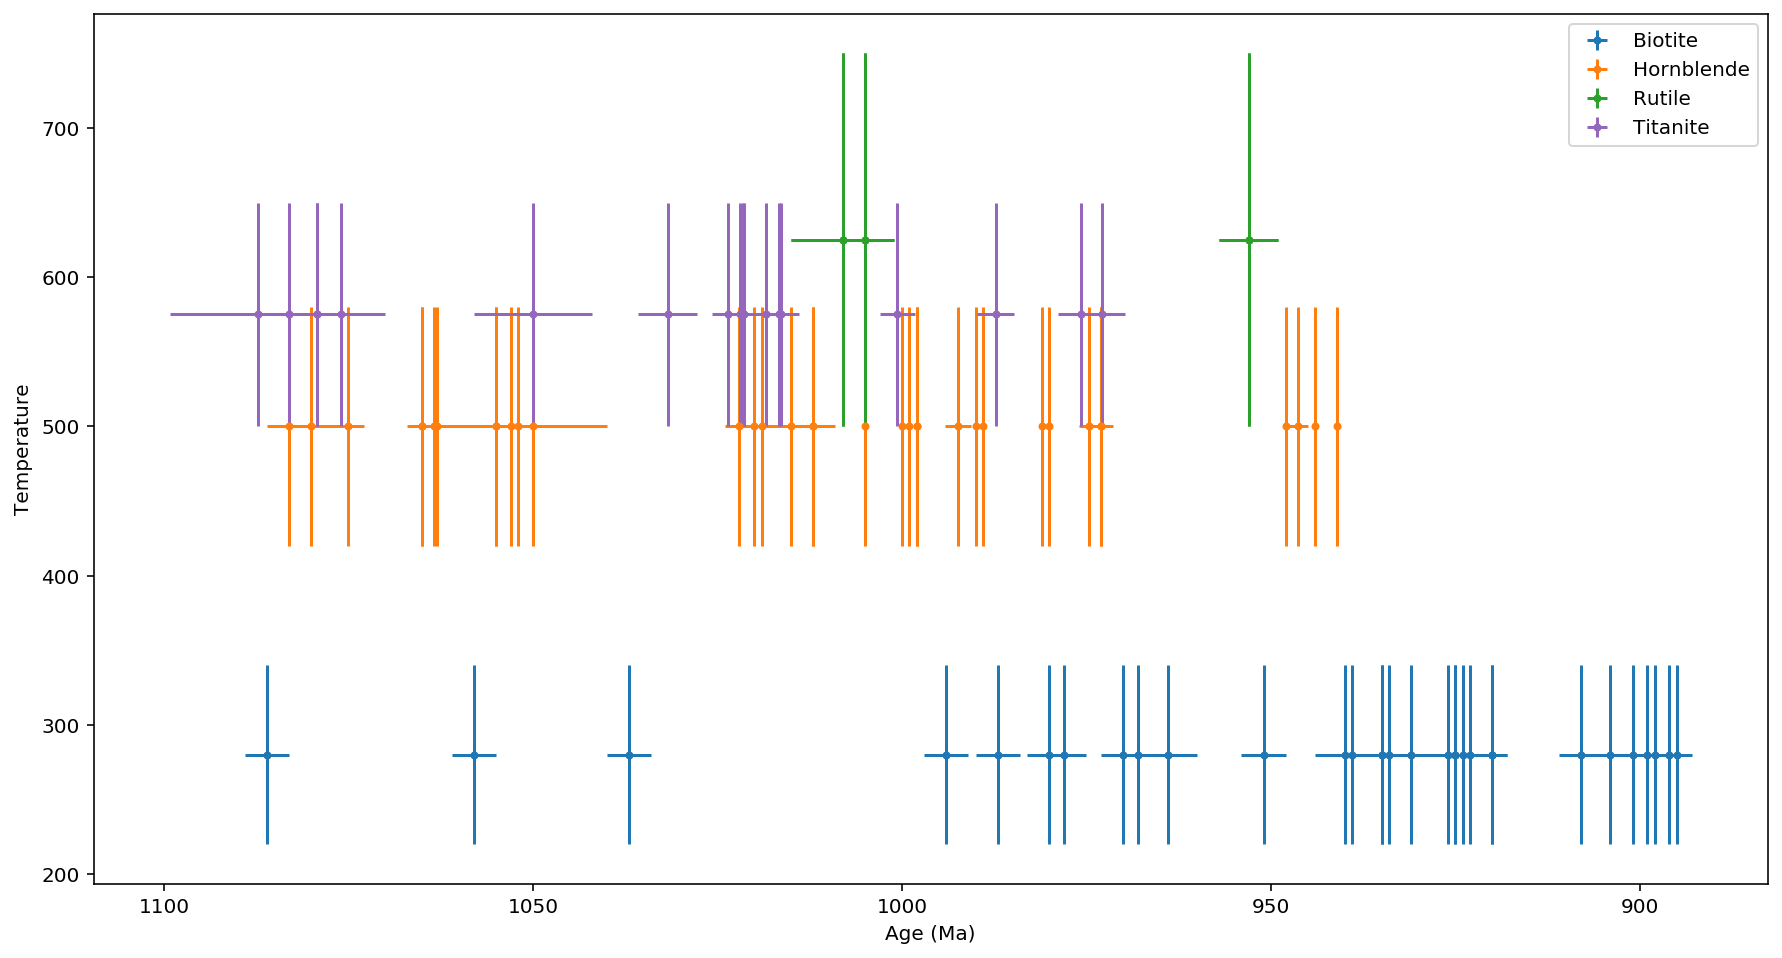

In [10]:
plt.figure(figsize=(15, 8))
for i in Adirondack_lowlands_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Adirondack_lowlands_ages[Adirondack_lowlands_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

## Load Adirondack highlands ages

In [11]:
Adirondack_highlands_ages = pd.read_csv('../data/thermochron_compilation/Adirondack_highlands.csv')
Adirondack_highlands_ages = Adirondack_highlands_ages[Adirondack_highlands_ages['Age'] < 1090]
Adirondack_highlands_ages = Adirondack_highlands_ages[Adirondack_highlands_ages['Age_Material'] != 'Garnet']
Adirondack_highlands_ages = Adirondack_highlands_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Adirondack_highlands_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,A142,919.00,1.00,1.00,Ar/Ar,Cooling,Total Gas Age,Biotite,Laser-Step,Estimate,Grenville Province,NY,44.17,-75.16,Small outcrop on the east side of Mud Lake Rd ...,Carthage-Colton shear zone,Metamorphic,hornblende granite,"Streepey, M.M., van der Pluijm, B.A., Essene, ..."
1,CN596-56,924.00,2.00,2.00,Ar/Ar,Cooling,Plateau Age,Biotite,Laser-Step,Direct,Grenville Province,NY,44.51,-74.99,0.2 miles south of junction of Hanson Rd and O...,Carthage-Colton shear zone,Metamorphic,hornblende granite,"Streepey, M.M., van der Pluijm, B.A., Essene, ..."
2,A136,937.00,8.00,8.00,Ar/Ar,Cooling,Total Gas Age,Biotite,Laser-Step,Estimate,Grenville Province,NY,44.56,-74.80,Small outcrop on Joe Indian Rd at the crest of...,Carthage-Colton shear zone,Metamorphic,hornblende granite,"Streepey, M.M., van der Pluijm, B.A., Essene, ..."
3,A136,943.30,1.37,1.37,Ar/Ar,Cooling,Plateau Age,Hornblende,Laser-Step,Total Gas Age,Grenville Province,NY,44.56,-74.80,Small outcrop on Joe Indian Rd. at the crest o...,Adirondack Highlands,Metamorphic,NaN,"Streepey, M.M., Lithgow-Bertelloni, C., van de..."
4,A145,947.27,1.12,1.12,Ar/Ar,Cooling,Plateau Age,Hornblende,Laser-Step,Total Gas Age,Grenville Province,NY,44.00,-75.43,"About 2 mi. E of Texas on Texas Rd., 6 mi. fro...",Adirondack Highlands,Metamorphic,NaN,"Streepey, M.M., Lithgow-Bertelloni, C., van de..."


In [12]:
Adirondack_highlands_ages.Age_Material.unique()

array(['Biotite', 'Hornblende', 'Monazite', 'Rutile', 'Titanite'],
      dtype=object)

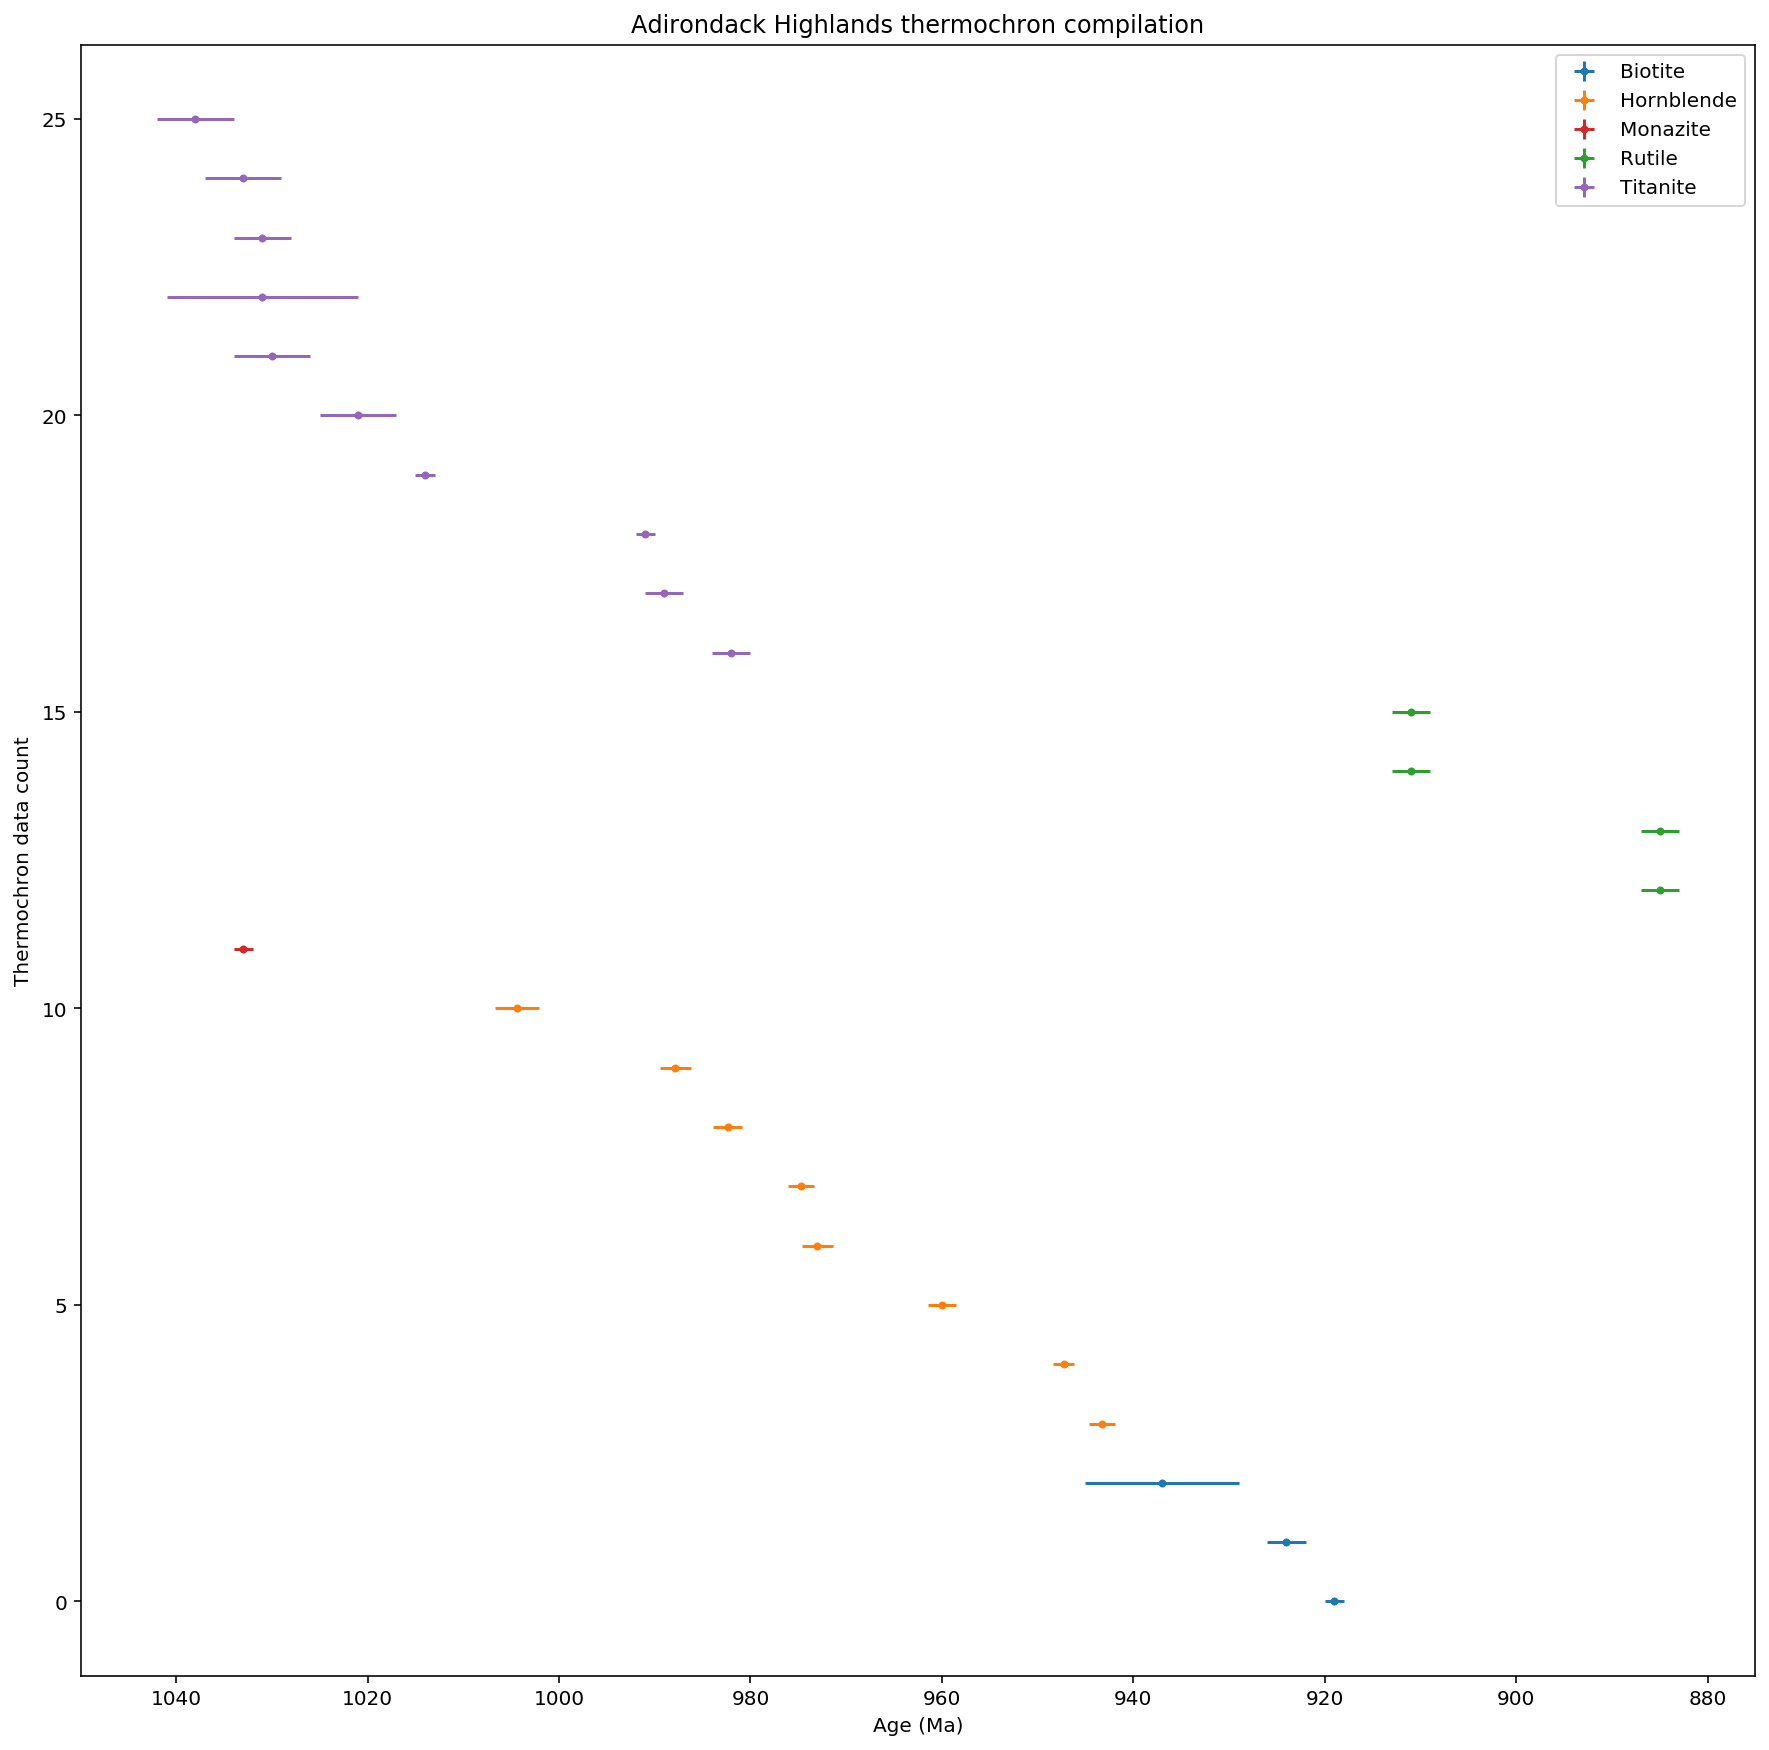

In [13]:
plt.figure(figsize=(15, 15))
for i in range(len(Adirondack_highlands_ages.Age_Material.unique())):
    this_material = Adirondack_highlands_ages[Adirondack_highlands_ages['Age_Material'] == Adirondack_highlands_ages.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index,  0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Adirondack_highlands_ages.Age_Material.unique()[i]], ls='None', label=Adirondack_highlands_ages.Age_Material.unique()[i])
plt.title('Adirondack Highlands thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()

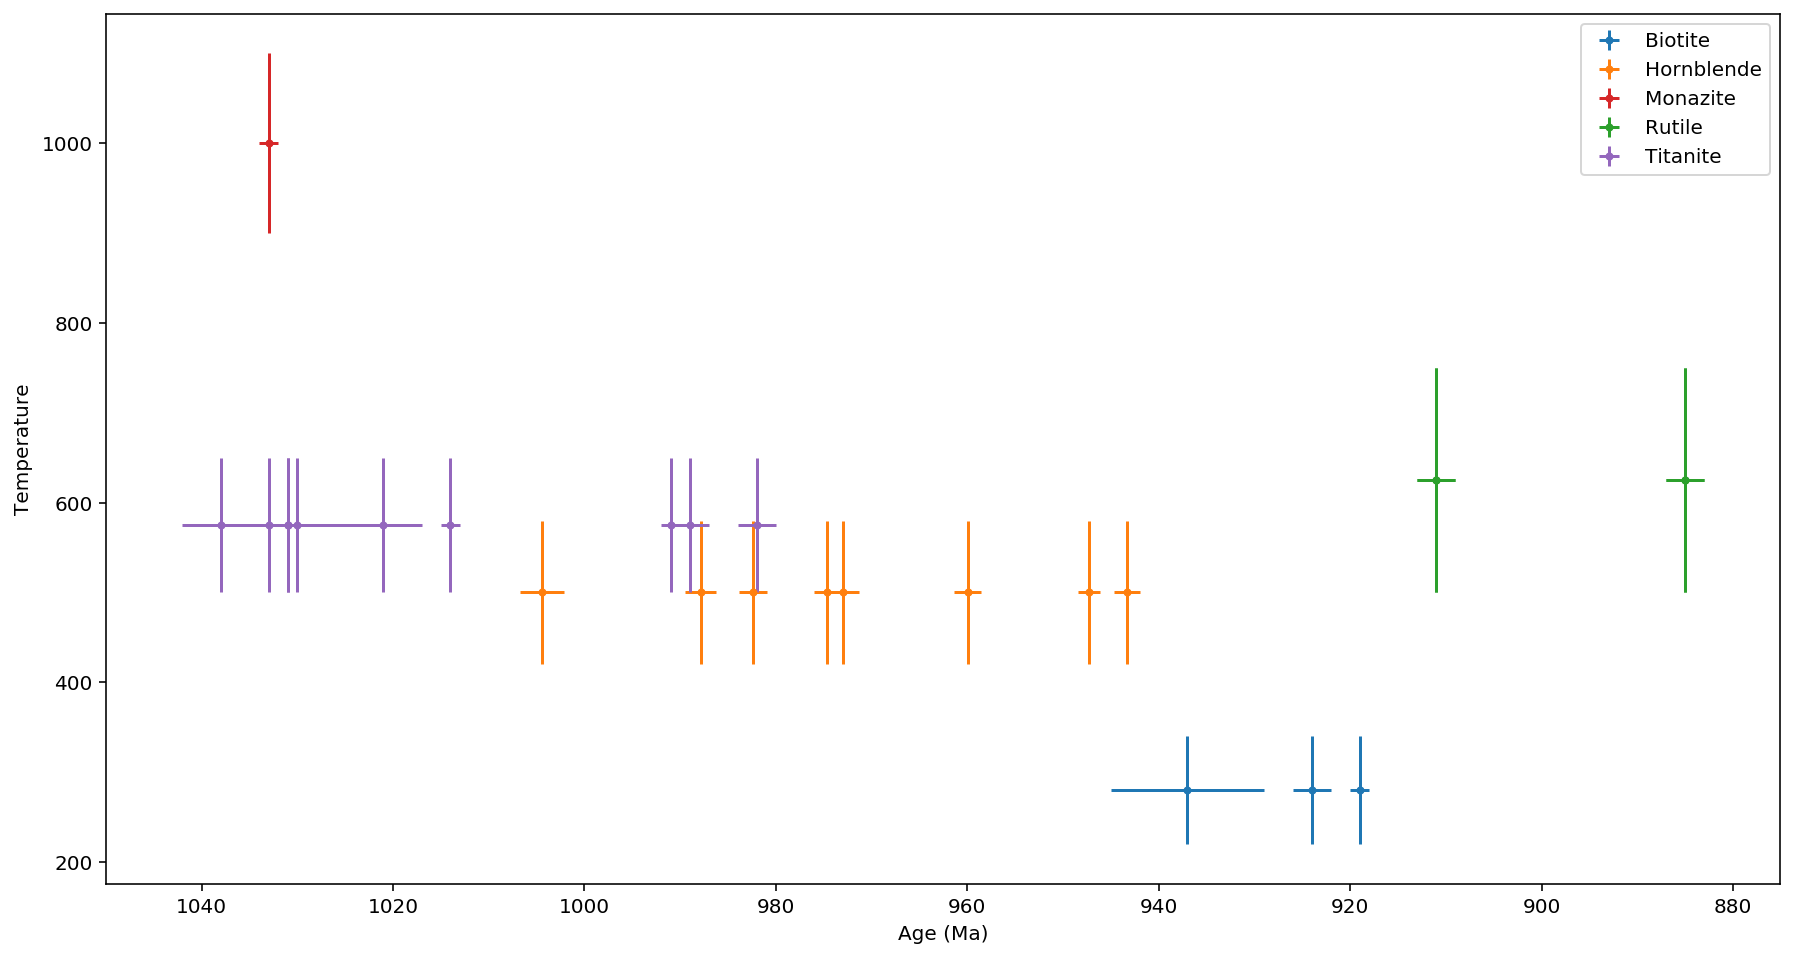

In [14]:
plt.figure(figsize=(15, 8))
for i in Adirondack_highlands_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Adirondack_highlands_ages[Adirondack_highlands_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

## Load Central Gneiss Belt ages

In [15]:
Central_Gneiss_Belt_ages = pd.read_csv('../data/thermochron_compilation/Central_Gneiss_Belt.csv')
Central_Gneiss_Belt_ages = Central_Gneiss_Belt_ages[Central_Gneiss_Belt_ages['Age'] < 1090]
Central_Gneiss_Belt_ages = Central_Gneiss_Belt_ages[~Central_Gneiss_Belt_ages['Age_Material'].str.contains('Muscovite|Allanite|Garnet|Zircon|K-Feldspar')]
Central_Gneiss_Belt_ages = Central_Gneiss_Belt_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Central_Gneiss_Belt_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,SSA-12,875.0,8.0,8.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,45.58720,-78.50004,No topographic reference given in report; loca...,"Central Metasedimentary Belt, Algonquin/McClin...",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
1,SSA-10B,904.0,8.0,8.0,Ar/Ar,Cooling,amphibolite,Biotite,Ar Furnace-Fusion,Direct,Grenville Province,ON,45.50006,-78.24977,Approx. 50 km WSE of Pembroke. Location approx...,Central Gneiss Belt - unknown,Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
2,PSA-2,904.0,8.0,8.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,45.44172,-80.02066,Location very approximate; not specifically lo...,Central Gneiss Belt - unknown,Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
3,SSA-8A,907.0,8.0,8.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,45.35005,-79.13314,NE of Huntsville. Location approximate.,"Central Gneiss Belt, Algonquin Domain - unknown",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
4,RDT-3,924.0,8.0,8.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,45.24958,-78.94818,No topographic reference given in report; loca...,"Central Gneiss Belt, Muskoka Domain - unknown",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."


In [16]:
Central_Gneiss_Belt_ages.Age_Material.unique()

array(['Biotite', 'Hornblende', 'Monazite', 'Rutile', 'Titanite'],
      dtype=object)

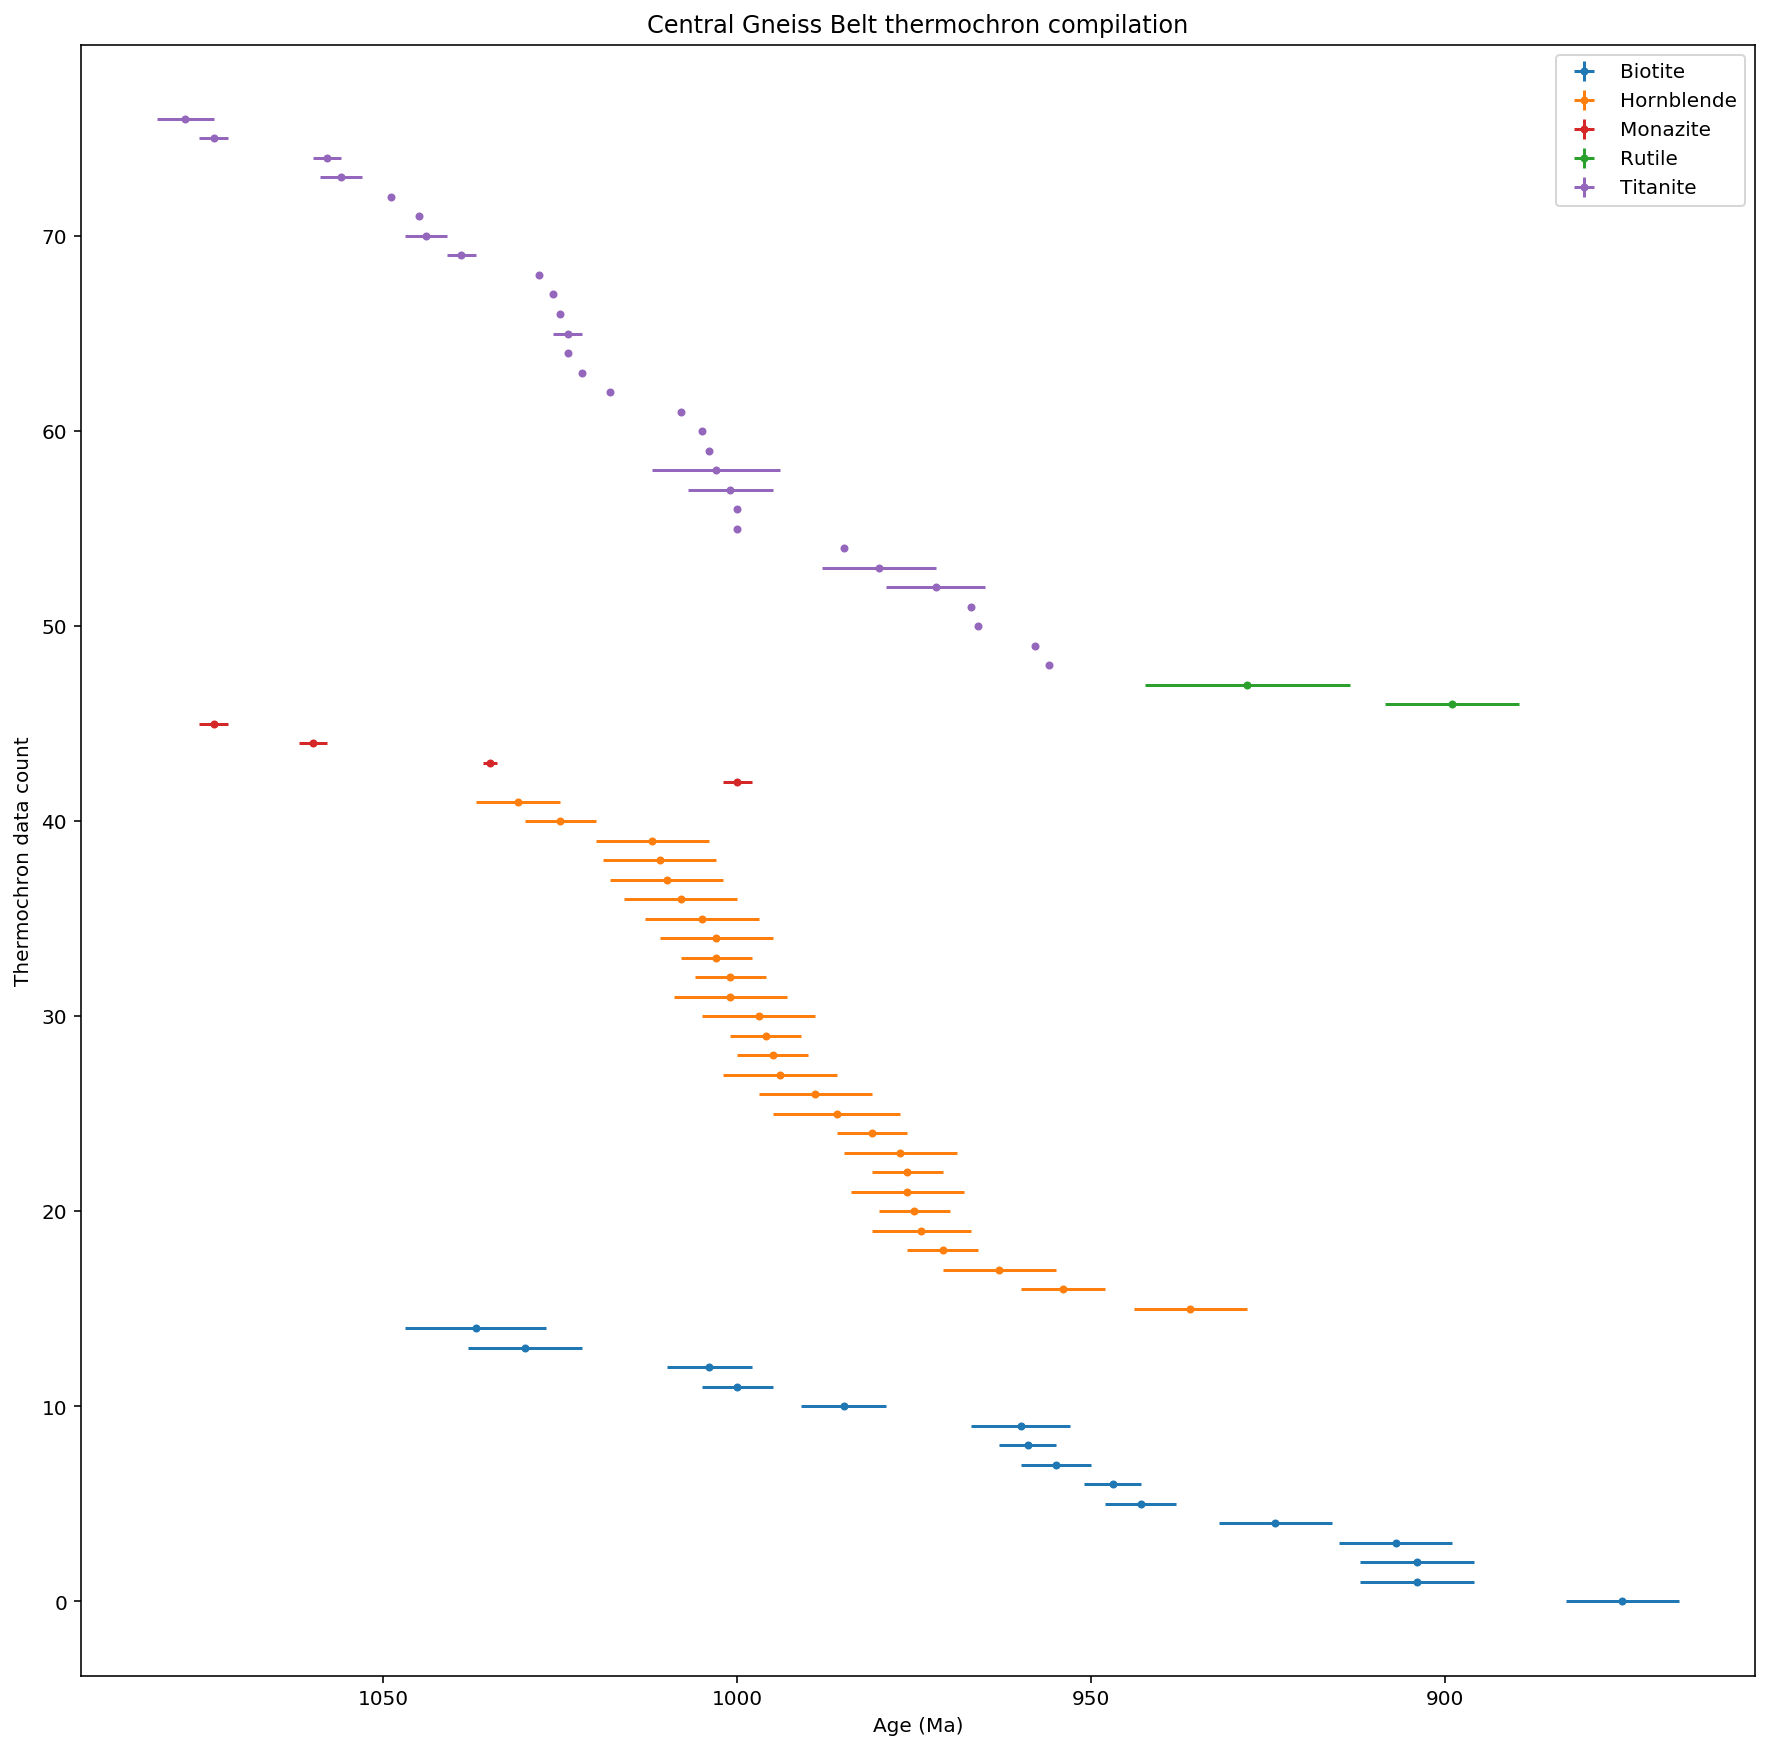

In [17]:
plt.figure(figsize=(15, 15))
for i in range(len(Central_Gneiss_Belt_ages.Age_Material.unique())):
    this_material = Central_Gneiss_Belt_ages[Central_Gneiss_Belt_ages['Age_Material'] == Central_Gneiss_Belt_ages.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index,  0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Central_Gneiss_Belt_ages.Age_Material.unique()[i]], ls='None', label=Central_Gneiss_Belt_ages.Age_Material.unique()[i])
plt.title('Central Gneiss Belt thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()

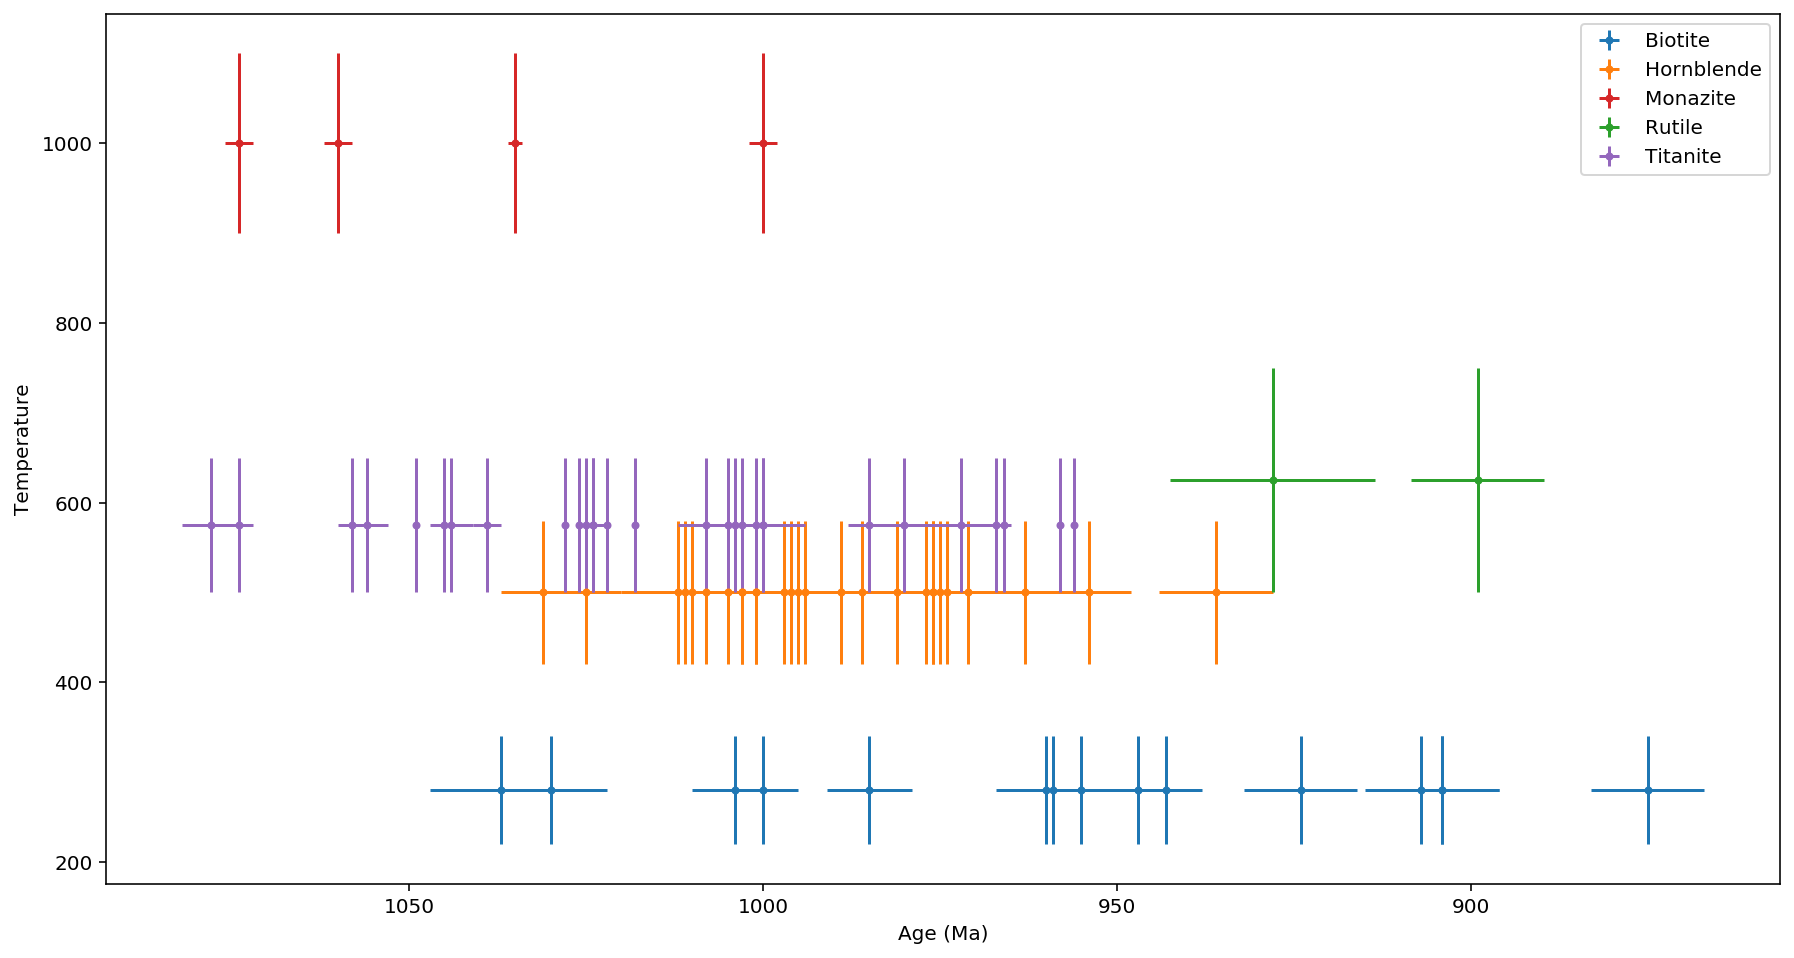

In [18]:
plt.figure(figsize=(15, 8))
for i in Central_Gneiss_Belt_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Central_Gneiss_Belt_ages[Central_Gneiss_Belt_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

## Load Central Metasedimentary Belt ages

In [19]:
Central_Meta_Belt_ages = pd.read_csv('../data/thermochron_compilation/Central_Metasedimentary_Belt.csv')
Central_Meta_Belt_ages = Central_Meta_Belt_ages[Central_Meta_Belt_ages['Age'] < 1090]
Central_Meta_Belt_ages = Central_Meta_Belt_ages[~Central_Meta_Belt_ages['Age_Material'].str.contains(
    'Muscovite|Allanite|Garnet|Zircon|K-Feldspar|Whole Rock|Phlogopite|Thorianite|Uraninite')]
Central_Meta_Belt_ages = Central_Meta_Belt_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Central_Meta_Belt_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,MIN86-3A,848,6.0,6.0,Ar/Ar,Cooling,amphibolite,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,45.03339,-78.78312,50 km W of Bancroft. Location approximate.,"Central Metasedimentary Belt, Boundary Zone - ...",Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
1,HL86-3,850,20.0,20.0,Ar/Ar,Cooling,amphibolite,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,44.61256,-77.16640,NE of Madoc. Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
2,HL86-2B,897,4.0,4.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,44.64589,-77.09972,NE of Madoc. Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
3,LVT130,905,2.0,2.0,Ar/Ar,Cooling,biotite muscovite quartz plagioclase sillimani...,Biotite,Laser-Step,Direct,Grenville Province,NaN,45.05876,-76.75339,Robertson Lake shear zone,Metasedimentary Belt,Metamorphic,amphibolite and mica schist,"Busch, J.P., and van der Pluijm, B.A., 1996, L..."
4,HL86-2C,917,4.0,4.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,44.64589,-77.09972,NE of Madoc. Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."


In [20]:
Central_Meta_Belt_ages.Age_Material.unique()

array(['Biotite', 'Hornblende', 'Monazite', 'Rutile', 'Titanite'],
      dtype=object)

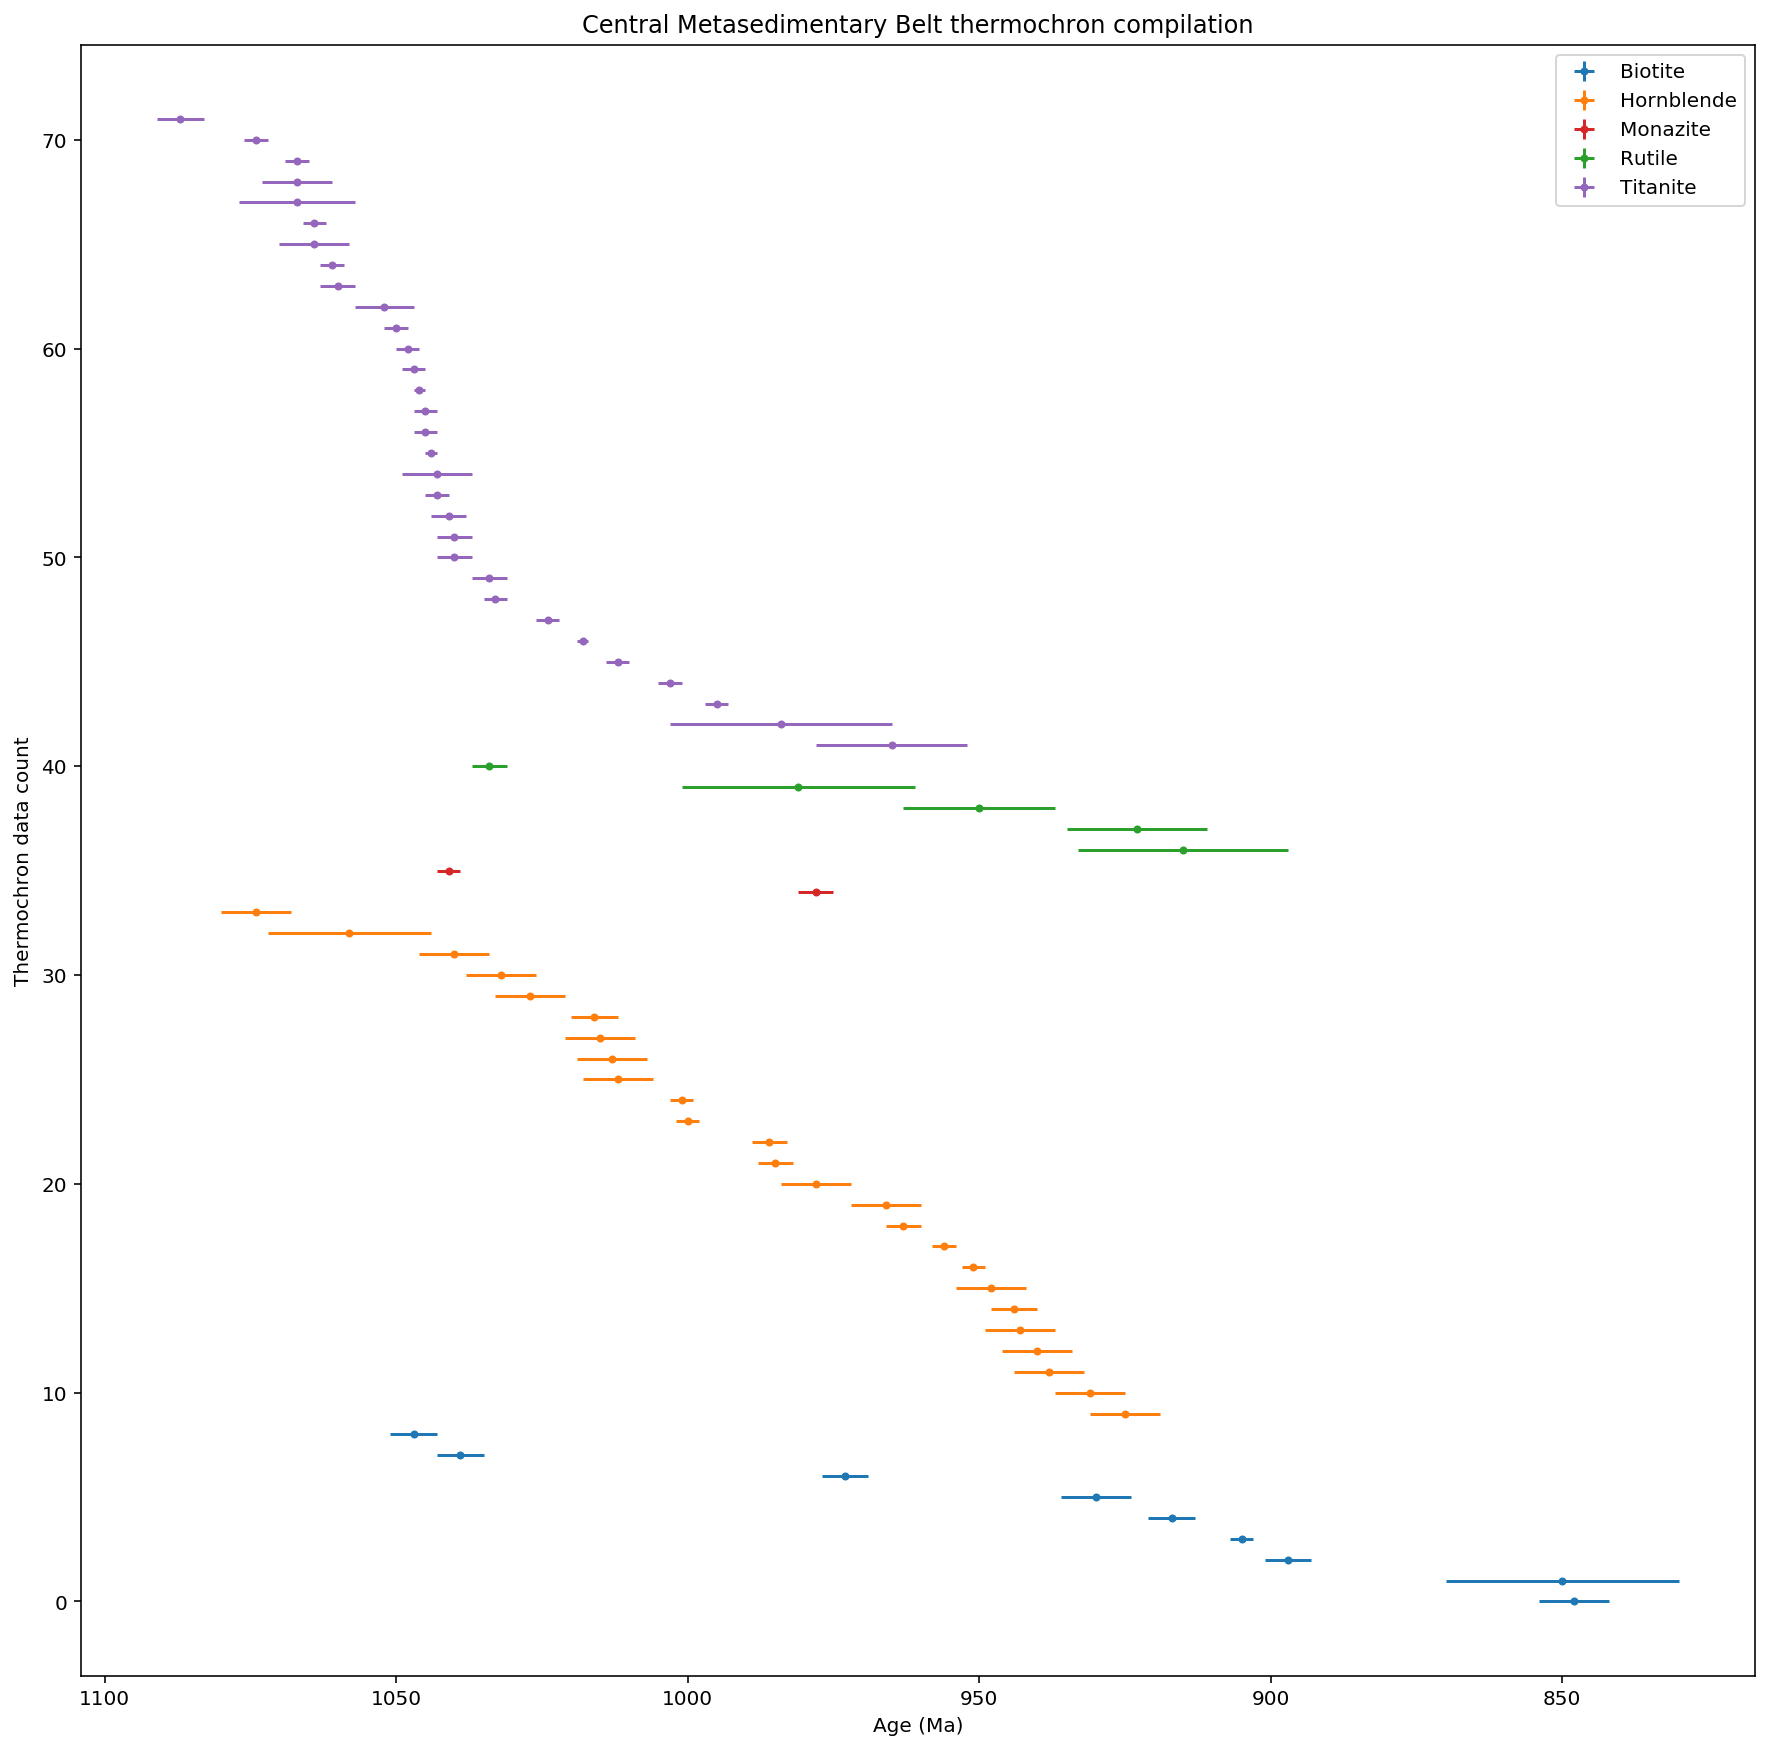

In [21]:
plt.figure(figsize=(15, 15))
for i in range(len(Central_Meta_Belt_ages.Age_Material.unique())):
    this_material = Central_Meta_Belt_ages[Central_Meta_Belt_ages['Age_Material'] == Central_Meta_Belt_ages.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index,  0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Central_Meta_Belt_ages.Age_Material.unique()[i]], ls='None', label=Central_Meta_Belt_ages.Age_Material.unique()[i])
plt.title('Central Metasedimentary Belt thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()

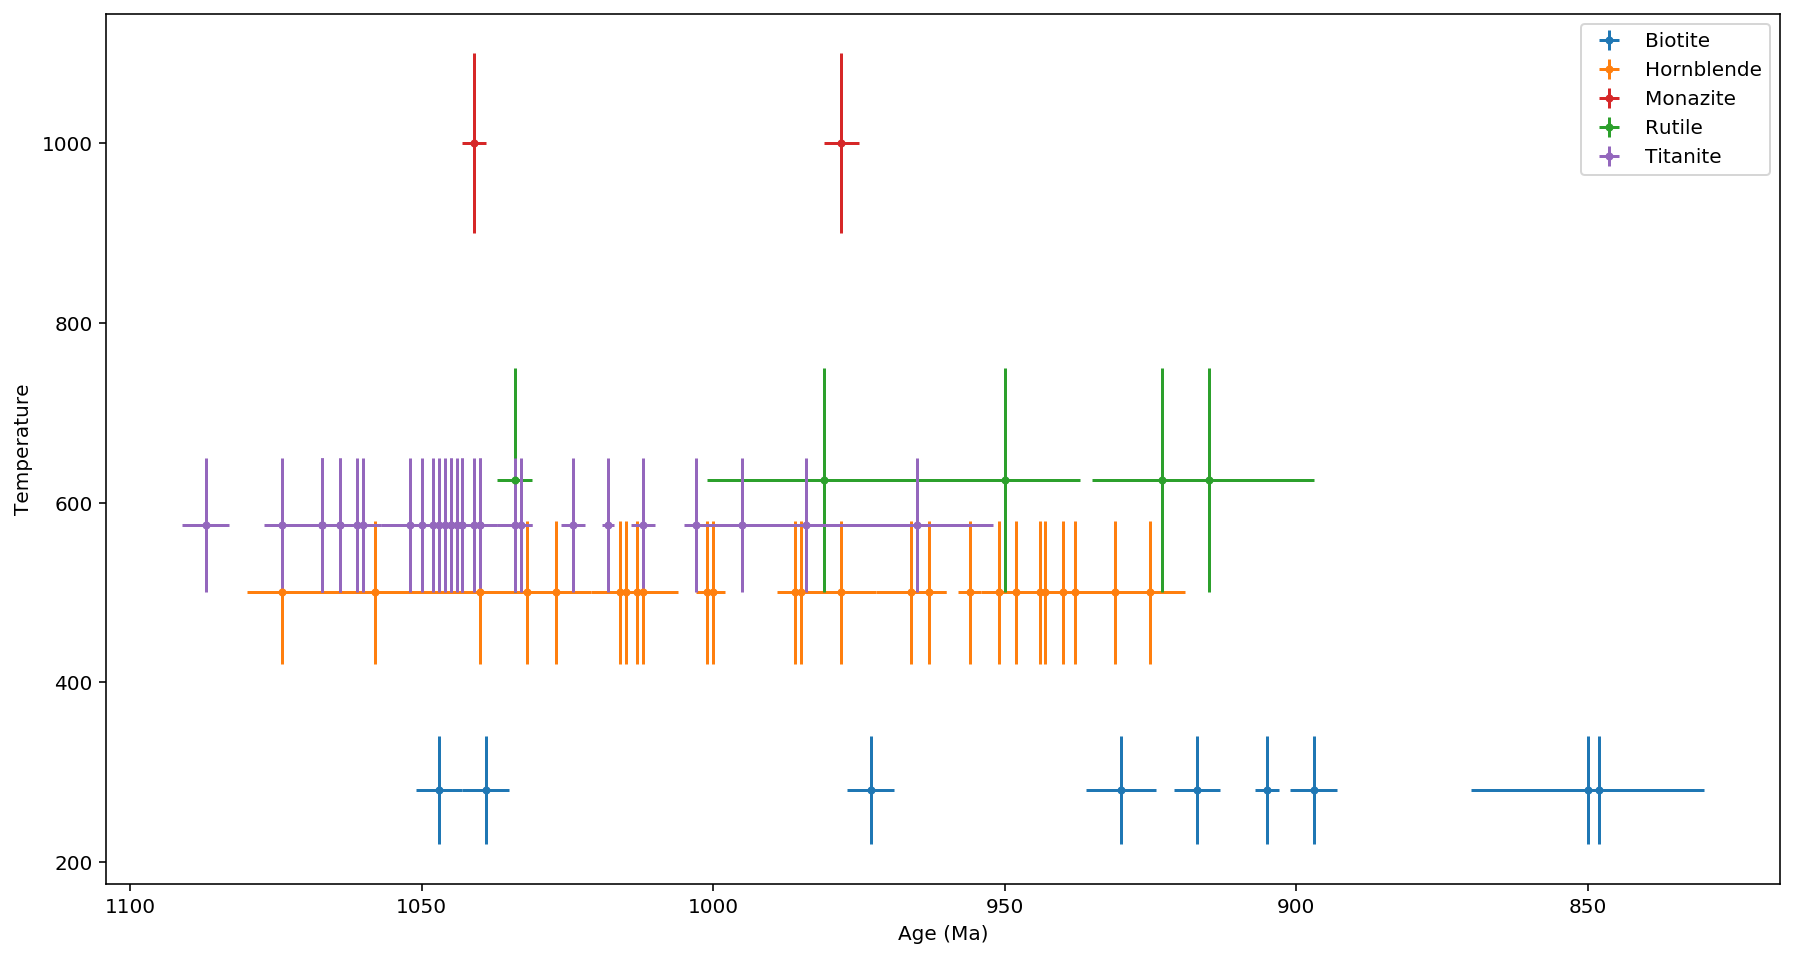

In [22]:
plt.figure(figsize=(15, 8))
for i in Central_Meta_Belt_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Central_Meta_Belt_ages[Central_Meta_Belt_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()